In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 12)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 12)

import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn import preprocessing, neighbors, grid_search, linear_model, cross_validation, metrics, feature_selection

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

import seaborn as sns

In [2]:
df = pd.read_csv(os.path.join('..', 'dataset', 'winequality-red.csv'))

In [3]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


A description of the dataset is as follows:

    fixed acidity in g/dm3
    volatile acidity in g/dm3
    citric acid in g/dm3
    residual sugar in g/dm3
    chlorides in g/dm3
    free sulfur dioxide in g/dm3
    total sulfur dioxide in g/dm3
    density in g/cm3
    pH
    sulphates in g/dm3
    alcohol in % vol.
    quality is the rating score

Quality is the dependent variable. 

Cleaning data - 
Checking for null values in the dataset

In [4]:
df.isnull()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,False,False,False,False,False,False,False,False,False,False,False,False
1594,False,False,False,False,False,False,False,False,False,False,False,False
1595,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.dropna()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [6]:
df.isnull().sum().sum()

0

Clean data frame (no null and no duplicates)

In [7]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [8]:
df.columns

Index([u'fixed acidity', u'volatile acidity', u'citric acid',
       u'residual sugar', u'chlorides', u'free sulfur dioxide',
       u'total sulfur dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [9]:
df.rename(columns={'fixed acidity': 'fixed_acidity', 'volatile acidity': 'volatile_acidity', 'citric acid': 'citric_acid', 'residual sugar': 'residual_sugar', 'free sulfur dioxide': 'free_sulfur_dioxide', 'total sulfur dioxide': 'total_sulfur_dioxide'}, inplace=True)

In [10]:
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

Exploratory Data Analysis

In [11]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Finding correlation

In [12]:
df.corr()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile_acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric_acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free_sulfur_dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total_sulfur_dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [13]:
df.var()

fixed_acidity              3.031416
volatile_acidity           0.032062
citric_acid                0.037947
residual_sugar             1.987897
chlorides                  0.002215
free_sulfur_dioxide      109.414884
total_sulfur_dioxide    1082.102373
density                    0.000004
pH                         0.023835
sulphates                  0.028733
alcohol                    1.135647
quality                    0.652168
dtype: float64

In [14]:
df.corr().quality.sort_values(ascending = False).head()

quality          1.000000
alcohol          0.476166
sulphates        0.251397
citric_acid      0.226373
fixed_acidity    0.124052
Name: quality, dtype: float64

From the table above, alcohol, sulphates,citric acid, and fixed acidity are highly correlated with quality. Those variables are the ones that will be used to predict the outcome - quality. 

In [15]:
df.quality.value_counts(dropna = False).sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

Check distribution of variable to see if it is normally distributed or not


Todo: plot histograms and qqplot

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x118c7cf50>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11b6ca490>]], dtype=object)

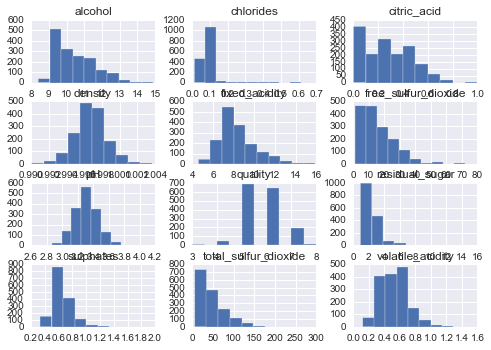

In [16]:
df.hist()

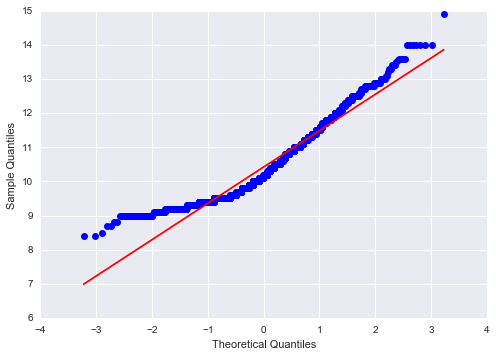

In [17]:
sm.qqplot(df.alcohol, line = 's')

pass

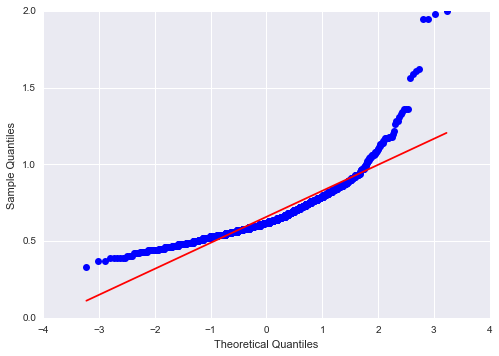

In [18]:
sm.qqplot(df.sulphates, line = 's')

pass

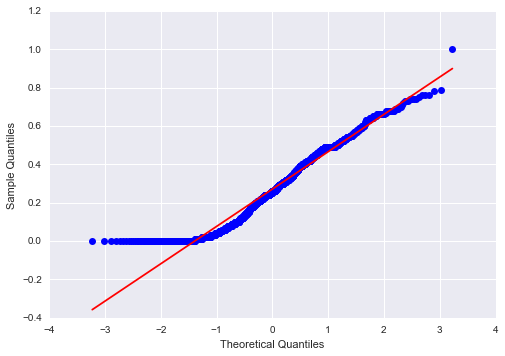

In [19]:
sm.qqplot(df.citric_acid, line = 's')

pass

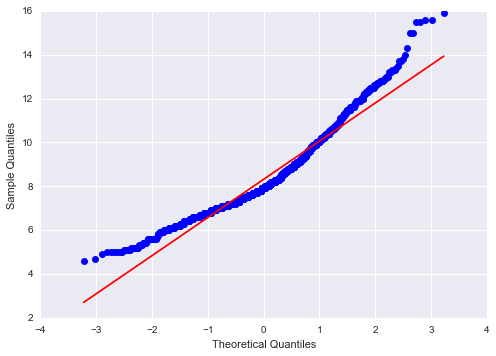

In [20]:
sm.qqplot(df.fixed_acidity, line = 's')

pass

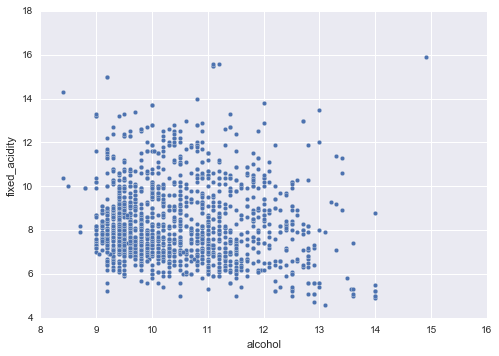

In [21]:
df.plot(kind = 'scatter', x = 'alcohol', y = 'fixed_acidity')

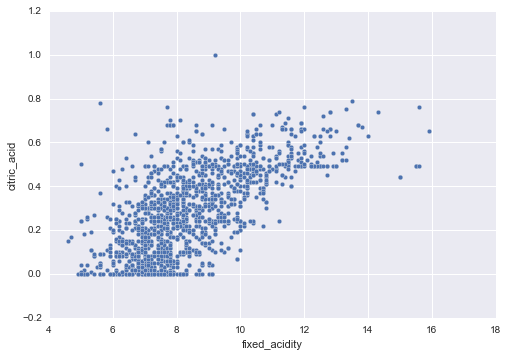

In [22]:
df.plot(kind = 'scatter', x = 'fixed_acidity', y = 'citric_acid')

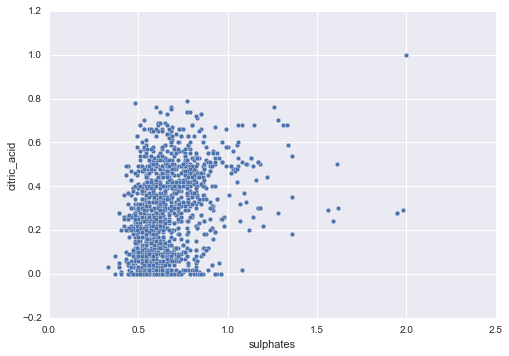

In [23]:
df.plot(kind = 'scatter', x = 'sulphates', y = 'citric_acid')

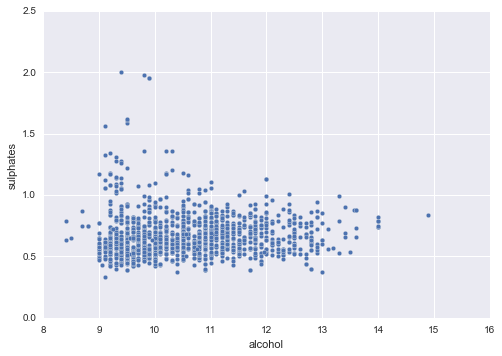

In [24]:
df.plot(kind = 'scatter', x = 'alcohol', y = 'sulphates')

Boxplot to look for outliers

/Users/general_assembly/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  if __name__ == '__main__':


{'boxes': [<matplotlib.lines.Line2D at 0x11d94ae10>],
 'caps': [<matplotlib.lines.Line2D at 0x11d92dc50>,
 'fliers': [<matplotlib.lines.Line2D at 0x11d918f50>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11d918910>],
 'whiskers': [<matplotlib.lines.Line2D at 0x11d92d050>,
  <matplotlib.lines.Line2D at 0x11d92d710>]}

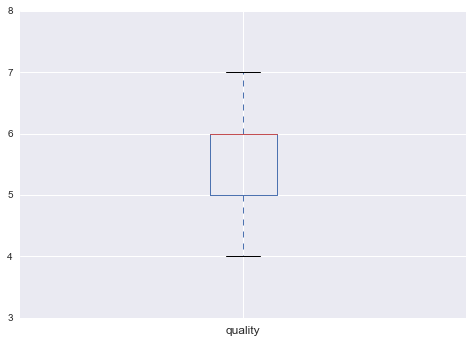

In [26]:
df.boxplot(column = 'quality')

In [30]:
df.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol',
       u'quality'],
      dtype='object')

In [31]:
model = smf.ols(formula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data = df).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 03 Nov 2016   Prob (F-statistic):          1.79e-145
Time:                        14:23:31   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               21.9652     21.195      1.036      0.300       -19.607    63.538
fixed_acidity            0.0250      0.026      0.963      0.336        -0.026     0.076
volatile_acidity        -1.0836      0.121     -8.948      0.000        -1.321    -0.846
citric_acid             -0.1826      0.147     -1.240      0.215        -0.471     0.106
residual_sugar           0.0163      0.015      1.089      0.276        -0.013     0.046
chlorides               -1.8742      0.419     -4.470      0.000        -2.697    -1.052
free_sulfur_dioxide      0.0044      0.002      2.009      0.045         0.000     0.009
total_sulfur_dioxide    -0.0033      0.001     -4.480      0.000        -0.005    -0.002
density                -17.8812     21.633     -0.827      0.409       -60.314    24.551
pH                      -0.4137      0.192     -2.159      0.031        -0.789    -0.038
sulphates                0.9163      0.114      8.014      0.000         0.692     1.141
alcohol                  0.2762      0.026     10.429      0.000         0.224     0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Training/Test split

In [32]:
X = df.drop('quality', axis= 1)

In [33]:
X

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2


In [34]:
y = df.quality

In [35]:
y

0       5
1       5
2       5
3       6
4       5
5       5
       ..
1593    6
1594    5
1595    6
1596    6
1597    5
1598    6
Name: quality, dtype: int64

In [36]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X, y, test_size=0.4, random_state=0)

In [37]:
print len (X_train)
print len (X_test)
print len (y_train)
print len (y_test)

959
640
959
640


Working with training set total of 959 data points

X_train.corr()

In [38]:
X_train.columns

Index([u'fixed_acidity', u'volatile_acidity', u'citric_acid',
       u'residual_sugar', u'chlorides', u'free_sulfur_dioxide',
       u'total_sulfur_dioxide', u'density', u'pH', u'sulphates', u'alcohol'],
      dtype='object')

In [41]:
X_train_model = smf.ols(formula = 'quality ~ fixed_acidity + volatile_acidity + citric_acid + residual_sugar + chlorides + free_sulfur_dioxide + total_sulfur_dioxide + density + pH + sulphates + alcohol', data = df).fit()

X_train_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.356
Method:                 Least Squares   F-statistic:                     81.35
Date:                Thu, 03 Nov 2016   Prob (F-statistic):          1.79e-145
Time:                        15:07:52   Log-Likelihood:                -1569.1
No. Observations:                1599   AIC:                             3162.
Df Residuals:                    1587   BIC:                             3227.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept               21.9652     21.195      1.036      0.300       -19.607    63.538
fixed_acidity            0.0250      0.026      0.963      0.336        -0.026     0.076
volatile_acidity        -1.0836      0.121     -8.948      0.000        -1.321    -0.846
citric_acid             -0.1826      0.147     -1.240      0.215        -0.471     0.106
residual_sugar           0.0163      0.015      1.089      0.276        -0.013     0.046
chlorides               -1.8742      0.419     -4.470      0.000        -2.697    -1.052
free_sulfur_dioxide      0.0044      0.002      2.009      0.045         0.000     0.009
total_sulfur_dioxide    -0.0033      0.001     -4.480      0.000        -0.005    -0.002
density                -17.8812     21.633     -0.827      0.409       -60.314    24.551
pH                      -0.4137      0.192     -2.159      0.031        -0.789    -0.038
sulphates                0.9163      0.114      8.014      0.000         0.692     1.141
alcohol                  0.2762      0.026     10.429      0.000         0.224     0.328
==============================================================================
Omnibus:                       27.376   Durbin-Watson:                   1.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.965
Skew:                          -0.168   Prob(JB):                     1.27e-09
Kurtosis:                       3.708   Cond. No.                     1.13e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
model = linear_model.LogisticRegression()

In [43]:
cross_validation.cross_val_score(model, X_train, y_train, cv = 5).mean()

0.55807890750148792

In [44]:
y_train_hat = cross_validation.cross_val_predict(model, X_train, y_train, cv = 5)

metrics.accuracy_score(y_train, y_train_hat)

0.5578727841501564